# Unit 5 - Financial Planning

In [293]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import yfinance as yahooFinance
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [309]:
# Load .env enviroment variables
load_dotenv()

False

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [52]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [53]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [54]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19250756,
   'total_supply': 19250756,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 16726.51,
     'volume_24h': 12969855914,
     'market_cap': 322153438882,
     'percentage_change_1h': 0.198536796242009,
     'percentage_change_24h': 0.43166392001583,
     'percentage_change_7d': -1.02705934569062,
     'percent_change_1h': 0.198536796242009,
     'percent_change_24h': 0.43166392001583,
     'percent_change_7d': -1.02705934569062},
    'CAD': {'price': 22722.963835,
     'volume_24h': 17619549259.169,
     'market_cap': 437645446721.197,
     'percent_change_1h': 0.198536796242009,
     'percent_change_24h': 0.43166392001583,
     'percent_change_7d': -1.02705934569062}},
   'last_updated': 1672726485}},
 'metadata': {'timestamp': 1672726485,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [195]:
btc_price = btc_data["data"] ["1"]["quotes"]["CAD"]["price"]
btc_price

22722.963835

In [56]:
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120525770,
   'total_supply': 120525770,
   'max_supply': 120525693,
   'quotes': {'USD': {'price': 1217.06,
     'volume_24h': 3778572492,
     'market_cap': 146790938570,
     'percentage_change_1h': 0.21899703344539,
     'percentage_change_24h': 1.18794725456893,
     'percentage_change_7d': -0.749508272092455,
     'percent_change_1h': 0.21899703344539,
     'percent_change_24h': 1.18794725456893,
     'percent_change_7d': -0.749508272092455},
    'CAD': {'price': 1653.37601,
     'volume_24h': 5133190730.382,
     'market_cap': 199415490047.345,
     'percent_change_1h': 0.21899703344539,
     'percent_change_24h': 1.18794725456893,
     'percent_change_7d': -0.749508272092455}},
   'last_updated': 1672726489}},
 'metadata': {'timestamp': 1672726489,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [57]:
eth_price = eth_data["data"] ["1027"]["quotes"]["CAD"]["price"]
eth_price

1653.37601

In [58]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27267.56
The current value of your 5.3 ETH is $8762.89


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [59]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [60]:
# Set Alpaca API key and secret
api_key = 'CKDBDJOHDD6I9STFSTYT'
api_secret_key = 'jzRJxNYnTZmBUeHHMJGdjvKl3Md6gxOKPbuXHjCK'
alpaca_api = tradeapi.REST('api_key', 'api_secret_key')

In [201]:
# Set the tickers
tickers = ["AGG", "SPY"]
agg_ticker = 'AGG'
spy_ticker = 'SPY'
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [296]:
import datetime
date = datetime.date.today()
start_date = datetime.datetime(2022, 1, 2)
end_date = datetime.datetime(2023, 1, 18)
SPY_df = yahooFinance.download("SPY", start = start_date, end = end_date)
AGG_df = yahooFinance.download("AGG", start = start_date, end = end_date)

AGG_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,113.669998,113.680000,113.300003,113.300003,110.748047,9399200
2022-01-04,113.220001,113.300003,113.080002,113.290001,110.738266,7772100
2022-01-05,113.339996,113.360001,112.900002,112.940002,110.396156,8530900
2022-01-06,112.750000,112.839996,112.660004,112.820000,110.278870,8866500
2022-01-07,112.690002,112.709999,112.339996,112.489998,109.956314,9018900


In [204]:
SPY_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,476.299988,477.850006,473.850006,477.709991,470.083679,72668200
2022-01-04,479.220001,479.980011,475.579987,477.549988,469.926239,71178700
2022-01-05,477.160004,477.980011,468.279999,468.380005,460.902649,104538900
2022-01-06,467.890015,470.820007,465.429993,467.940002,460.469696,86858900
2022-01-07,467.950012,469.200012,464.649994,466.089996,458.649231,85111600


In [205]:
closing_price_df = pd.concat([AGG_df, SPY_df], axis = 1, keys = ["AGG", "SPY"])
closing_price_df.head()


AGG                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2022-01-03  113.669998  113.680000  113.300003  113.300003  110.748047   
2022-01-04  113.220001  113.300003  113.080002  113.290001  110.738281   
2022-01-05  113.339996  113.360001  112.900002  112.940002  110.396164   
2022-01-06  112.750000  112.839996  112.660004  112.820000  110.278862   
2022-01-07  112.690002  112.709999  112.339996  112.489998  109.956299   

                            SPY                                      \
             Volume        Open        High         Low       Close   
Date                                                                  
2022-01-03  9399200  476.299988  477.850006  473.850006  477.709991   
2022-01-04  7772100  479.220001  479.980011  475.579987  477.549988   
2022-01-05  8530900  477.160004  477.980011  468.279999  468.380005   
2022-01-06  8866500  467.890015  470.820007  465.429993  467.940002   
2022-01-07  9018900  467.950012  469.200012  464.649994  466.089996   

                                   
             Adj Close     Volume  
Date                               
2022-01-03  470.083679   72668200  
2022-01-04  469.926239   71178700  
2022-01-05  460.902649  104538900  
2022-01-06  460.469696   86858900  
2022-01-07  458.649231   85111600

In [206]:
# Pick AGG and SPY close prices
agg_close_price = closing_price_df["AGG"]["Close"][-1]
spy_close_price = closing_price_df["SPY"]["Close"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.55999755859375
Current SPY closing price: $380.82000732421875


In [207]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19041.00
The current value of your 200 AGG shares is $19512.00


### Savings Health Analysis

In [208]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_crypto_saving = my_btc_value + my_eth_value
my_stock_saving = my_agg_value + my_spy_value
# Create savings DataFrame
df_savings = pd.DataFrame([my_crypto_saving,my_stock_saving], columns=["amount"])

index = pd.Index(["crypto","shares"])
df_savings = df_savings.set_index(index)

display(df_savings)

,amount
crypto,36030.449455
shares,38552.999878


<AxesSubplot:title={'center':'Savings Portfolio'}, ylabel='amount'>

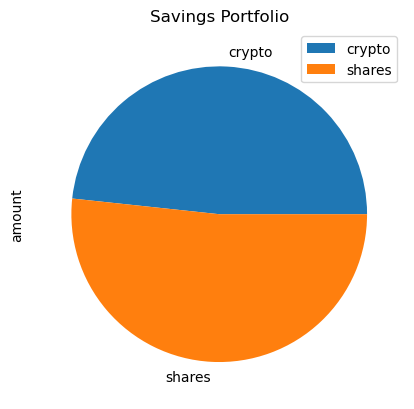

In [209]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Savings Portfolio")

In [298]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount = my_crypto_saving + my_stock_saving
# Validate saving health
if total_amount > emergency_fund:
    print("Congratulations! You have enough money in your fund")
elif total_amount == emergency_fund:
    print("You reached financial goal")
else:
    print(f"you are ${(emergency_fund-total_amount):0.2f}funds short")

Congratulations! You have enough money in your fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [311]:
# Set start and end dates of five years back from today.
start_date_5y = datetime.datetime(2018, 1, 1)
end_date_5y = datetime.datetime(2023, 1, 2)

SPY_df = yahooFinance.download("SPY", start = start_date_5y, end = end_date_5y)
AGG_df = yahooFinance.download("AGG", start = start_date_5y, end = end_date_5y)

# Sample results may vary from the solution based on the time frame chosen
spy5_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,open,high,low,close,Adj Close,volume
Date,,,,,,
2018-01-02,267.839996,268.809998,267.399994,268.769989,246.766647,86655700
2018-01-03,268.959991,270.640015,268.959991,270.470001,248.327484,90070400
2018-01-04,271.200012,272.160004,270.540009,271.609985,249.374130,80636400
2018-01-05,272.510010,273.559998,271.950012,273.420013,251.036072,83524000
2018-01-08,273.309998,274.100006,272.980011,273.920013,251.495071,57319200


In [286]:
agg5_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,109.260002,109.309998,108.970001,109.169998,96.911804,8850900
2018-01-03,109.250000,109.250000,109.089996,109.180000,96.920654,2441700
2018-01-04,109.019997,109.150002,108.970001,109.110001,96.858521,2945400
2018-01-05,109.150002,109.150002,108.949997,109.040001,96.796364,4322900
2018-01-08,109.110001,109.110001,108.949997,109.010002,96.769775,3394500


In [299]:
agg5_df.rename(columns = {'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)
spy5_df.rename(columns = {'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!


# Concatenate the ticker DataFrames
combined5_df = pd.concat([agg5_df, spy5_df], axis=1, keys=["AGG", "SPY"])


combined5_df.head()

AGG                                                 \
                  open        high         low       close  Adj Close   
Date                                                                    
2018-01-02  109.260002  109.309998  108.970001  109.169998  96.911804   
2018-01-03  109.250000  109.250000  109.089996  109.180000  96.920654   
2018-01-04  109.019997  109.150002  108.970001  109.110001  96.858521   
2018-01-05  109.150002  109.150002  108.949997  109.040001  96.796364   
2018-01-08  109.110001  109.110001  108.949997  109.010002  96.769775   

                            SPY                                      \
             volume        open        high         low       close   
Date                                                                  
2018-01-02  8850900  267.839996  268.809998  267.399994  268.769989   
2018-01-03  2441700  268.959991  270.640015  268.959991  270.470001   
2018-01-04  2945400  271.200012  272.160004  270.540009  271.609985   
2018-01-05  4322900  272.510010  273.559998  271.950012  273.420013   
2018-01-08  3394500  273.309998  274.100006  272.980011  273.920013   

                                  
             Adj Close    volume  
Date                              
2018-01-02  246.766647  86655700  
2018-01-03  248.327484  90070400  
2018-01-04  249.374130  80636400  
2018-01-05  251.036072  83524000  
2018-01-08  251.495071  57319200

In [288]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = combined5_df,
    weights = [40, 60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [289]:
# Printing the simulation input data
MC_5y_dist.portfolio_data.head()

AGG                                               \
                  open        high         low       close   volume   
Date                                                                  
2018-01-02  109.260002  109.309998  108.970001  109.169998  8850900   
2018-01-03  109.250000  109.250000  109.089996  109.180000  2441700   
2018-01-04  109.019997  109.150002  108.970001  109.110001  2945400   
2018-01-05  109.150002  109.150002  108.949997  109.040001  4322900   
2018-01-08  109.110001  109.110001  108.949997  109.010002  3394500   

                                SPY                                      \
           daily_return        open        high         low       close   
Date                                                                      
2018-01-02          NaN  267.839996  268.809998  267.399994  268.769989   
2018-01-03     0.000092  268.959991  270.640015  268.959991  270.470001   
2018-01-04    -0.000641  271.200012  272.160004  270.540009  271.609985   
2018-01-05    -0.000642  272.510010  273.559998  271.950012  273.420013   
2018-01-08    -0.000275  273.309998  274.100006  272.980011  273.920013   

                                   
              volume daily_return  
Date                               
2018-01-02  86655700          NaN  
2018-01-03  90070400     0.006325  
2018-01-04  80636400     0.004215  
2018-01-05  83524000     0.006664  
2018-01-08  57319200     0.001829

In [270]:
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 110.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 120.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 130.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 140.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 150.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 160.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 170.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 180.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 190.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 200.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 210.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 220.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 230.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 240.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 250.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 260.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 270.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 280.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 290.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 300.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 310.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 320.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 330.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 340.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 350.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 360.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 370.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 380.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 390.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 400.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 410.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 420.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 430.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 440.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 450.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 460.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 470.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 480.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

Running Monte Carlo simulation number 490.


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly f

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003747,0.983361,1.005481,0.998598,0.998268,0.994173,0.986875,0.987741,1.000549,0.997817,...,1.002311,0.985159,1.008746,1.011142,0.997272,1.011232,1.001636,1.004928,0.997968,1.009337
2,1.004877,1.003574,1.011626,1.010890,1.008792,0.995499,0.988528,0.983533,1.009879,0.989777,...,0.997484,0.979951,1.008103,1.014879,1.006746,1.015602,0.998557,1.015331,0.988618,1.015287
3,1.010819,0.995216,1.007694,0.987773,1.012092,0.995714,1.001489,0.985425,1.012484,0.990172,...,1.004332,0.978559,1.004289,1.001549,1.007185,1.008370,0.999629,1.012785,0.985055,1.009738
4,1.012229,0.986383,1.002210,0.977758,1.007769,1.000755,0.996540,0.993160,1.005169,0.993484,...,1.023617,0.977186,1.010457,1.000343,1.020067,1.018590,0.985261,1.005907,0.987567,1.003620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.252765,7.048687,9.786141,4.350315,0.738338,3.675010,1.284207,2.611815,0.878575,4.409725,...,9.640043,6.975776,6.563888,1.755751,2.312735,1.196842,3.894771,1.295280,5.534762,3.850390
7557,3.289516,7.139628,9.780637,4.394875,0.734070,3.619894,1.292178,2.606946,0.888383,4.326459,...,9.729651,7.028743,6.539439,1.751590,2.306135,1.196675,3.854567,1.299177,5.519941,3.860974
7558,3.306268,7.130318,9.765957,4.380715,0.741512,3.696973,1.275778,2.586193,0.890348,4.321116,...,9.782266,7.009140,6.553199,1.716358,2.288617,1.206245,3.878967,1.284401,5.553889,3.871808
7559,3.302895,7.148769,9.695345,4.405096,0.754139,3.708382,1.275415,2.609760,0.900329,4.343889,...,9.778121,6.979068,6.610420,1.729076,2.285040,1.200791,3.796888,1.294943,5.522067,3.852080


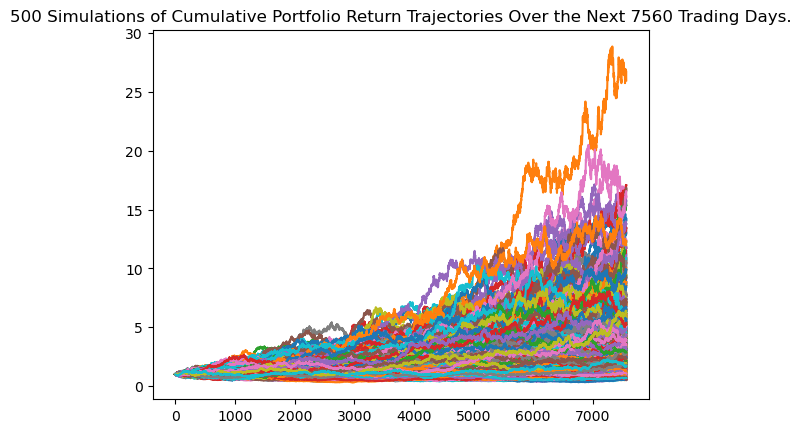

In [302]:
# Plot simulation outcomes
line_plot_5y = MC_5y_dist.plot_simulation()

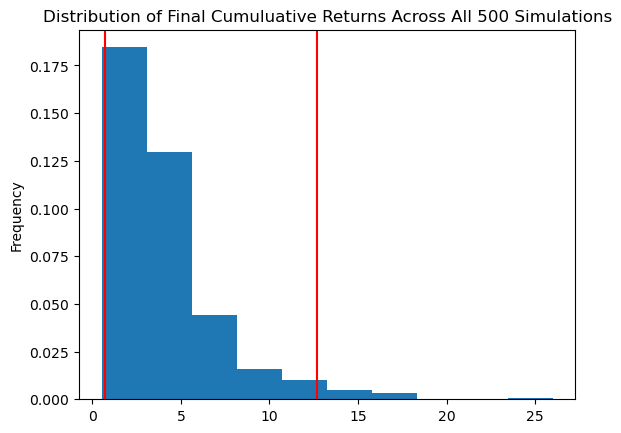

In [275]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5y_dist.plot_distribution()

### Retirement Analysis

In [282]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_5y_dist.summarize_cumulative_return()
# Print summary statistics
print(summary)

count           500.000000
mean              4.045203
std               3.106542
min               0.523499
25%               1.956481
50%               3.226462
75%               4.959468
max              25.992567
95% CI Lower      0.694091
95% CI Upper     12.664692
Name: 7560, dtype: float64


/Users/prsm/Desktop/Fintech/Projects/Instructions-4/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [305]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $13881.81 and $253293.85


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [308]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $20822.72 and $379940.77
